## Flight Price Prediction	


## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

## FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_excel('Flight_Price_Prediction_Data_Train.xlsx')

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
df_test = pd.read_excel("Flight_Price_Prediction_Test_set.xlsx")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# Exploratory Data Analysis

## Feature Engineering


Working on all the columns and converting them to numeric

The columns Date_of_Journey, Arrival_Time and Dep_Time has datetime datatype but its reflecting as object. So lets convert this datatype into timestamp to use it properly for prediction.Convering the dateframe

In [6]:
# Checking for null values in the dataframe
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
df.shape

(10683, 11)

In [16]:
df.dropna(inplace=True)

In [17]:
# Checking for null values in the dataframe
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [20]:
# Converting Date and time columns from object type to Datetime type
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [21]:
# Rechecking the datatypes
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Now splitting Date_of_journey into Month and Day, and as the dataset contains only 2019 year data so no need to take year column.

In [22]:
# Extracting Day from Date_of_journey column
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format = "%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format = "%d/%m/%Y").dt.month

So we have splitted the column Date_of_Journey into integer datatype , now we can drop this column as it is of no use.



In [23]:
# Dropping Date_of_journey column
df.drop("Date_of_Journey", axis = 1, inplace = True)

In [24]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-07-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-29 05:50:00,2022-07-29 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-29 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-07-29 18:05:00,2022-07-29 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-07-29 16:50:00,2022-07-29 21:35:00,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-07-29 19:55:00,2022-07-29 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-07-29 20:45:00,2022-07-29 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-07-29 08:20:00,2022-07-29 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2022-07-29 11:30:00,2022-07-29 14:10:00,2h 40m,non-stop,No info,12648,3,1


In [25]:
# Duration

df['Duration'] = df['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

#now lets convert this column into a numeric

df['Duration'] = pd.to_numeric(df['Duration'])

In [26]:
df['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

Extracting hours and mins from Dep_Time column and dropping Dep_Time.

In [27]:
# Extracting Hours from Dep_Time column
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [28]:
# Dropping Dep_Time column
df.drop("Dep_Time", axis = 1, inplace = True)


In [29]:
# Extracting Arrival_Hour from Arrival_Time column
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
df.drop("Arrival_Time", axis = 1, inplace = True)

In [30]:
# Lets check dataframe now
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [31]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1


From the above list of unique values, we can see some repeated categories in some columns. Lets replace them.

In [32]:


# Replacing "New Delhi" as "Delhi" in Destination column
df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

# In the column "Additional Info", "No Info" and "No info" are same so replacing it by "No Info
df['Additional_Info'] = df['Additional_Info'].replace("No info", "No Info")


In [33]:
# Checking for columns in the dataset
df.columns.tolist()

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min']

In [35]:
# Checking the list of counts in the target column.
df["Price"].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [34]:
# Checking whether the dataset contains any space
df.loc[df['Price']==" "]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min


There is no empty space in any of the columns.

## Description of Dataset

In [36]:
# Statistical summary of the dataset
df.describe()

,Duration,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,643.020502,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601
std,507.830133,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808
min,5.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


* No missing values
* The mean value is greater than the median(50%) in the columns Price,Journey_Day,Duration and Dep_Hour so we can say they are skewed to right.
* The median(50%) is bit greater than mean in Dep_Min,Arrival_Hour and Arrival_Min which means they are skewed to left.
* Also there is a huge difference in maximum and 75% percentile in the columns Price, Arrival_Min which leads to outlies in thoe columns
* The std of target variable is high which means it has high rate of dispersion.

# Lets separate numerical and categorical column.


In [37]:

# Checking categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i) 
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [38]:
# Checking numerical column
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


# Distribution of skewness


## Plotting numerical columns


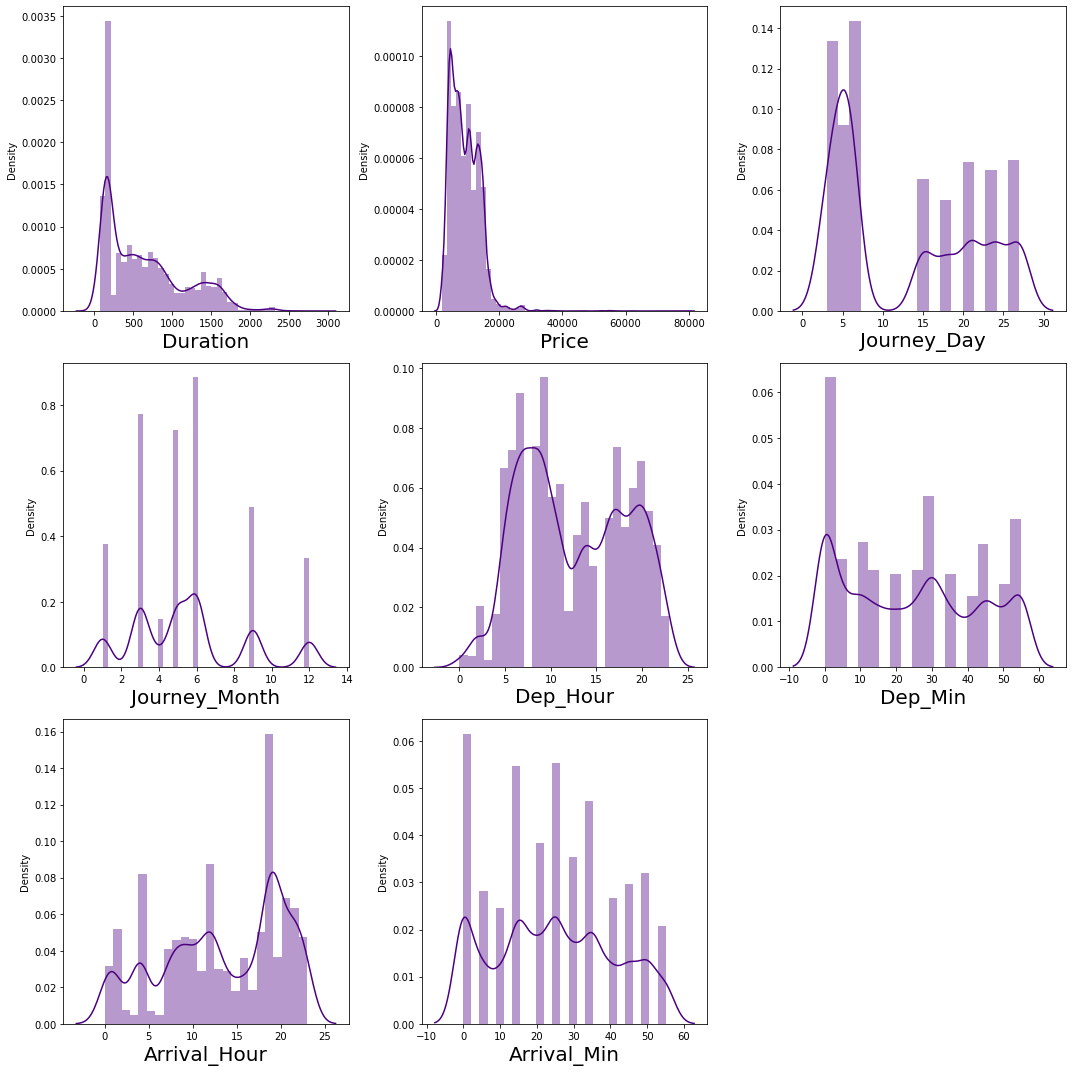

In [41]:
# Checking numerical columns
plt.figure(figsize = (15, 15))
plotnumber = 1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col], color = 'indigo')
        plt.xlabel(col, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

# Outliers

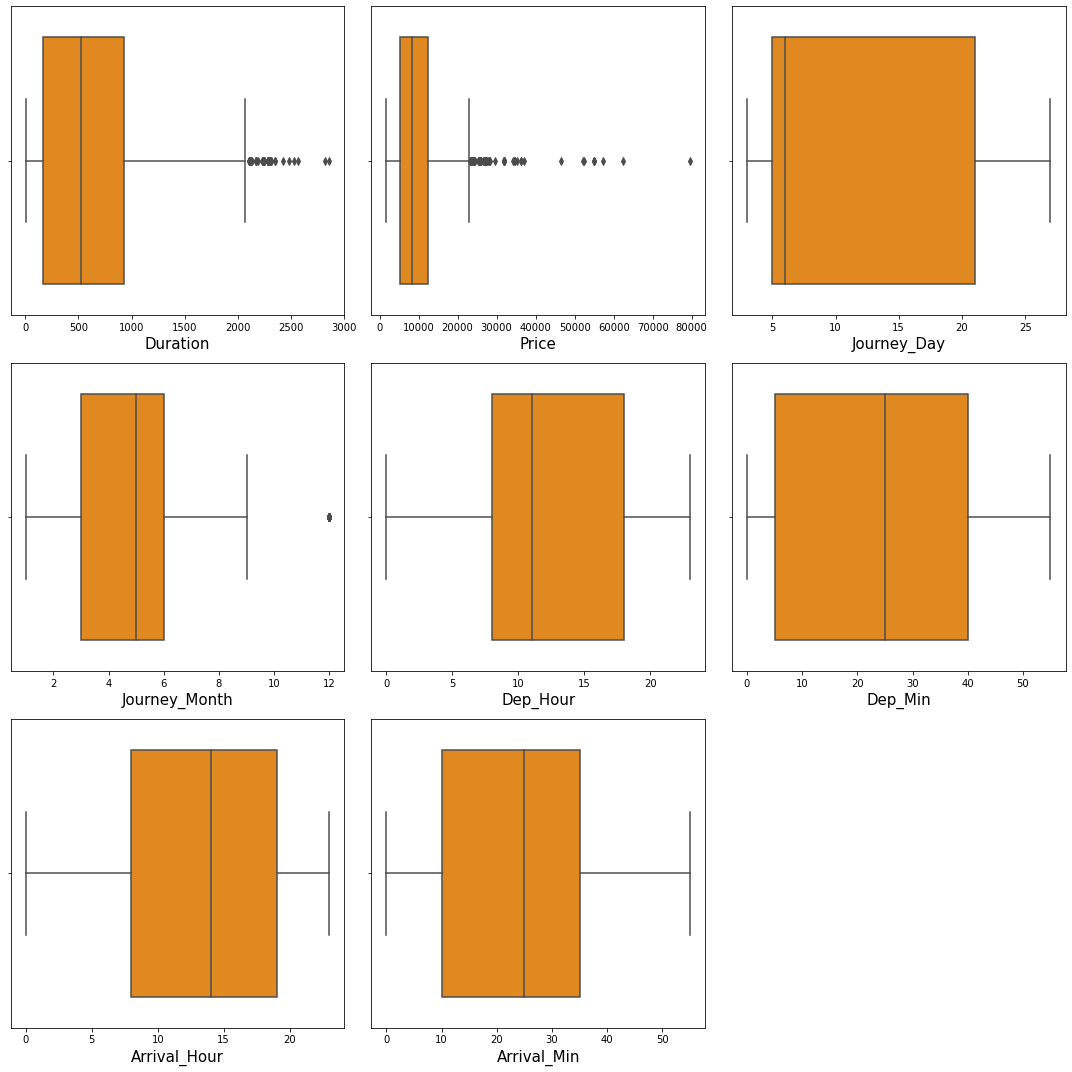

In [42]:
# Identifying the outliers using boxplot

plt.figure(figsize = (15, 15), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[col], color = "darkorange")
        plt.xlabel(col, fontsize = 15)
    plotnumber+=1
plt.tight_layout() 

* The outliers are present in the columns "Duration","Journey_Month" and the target variable "Price".


Since "Price" is the target column so no need to remove outliers from this column.

 We need to remove the outliers from the other two columns using zscore or IQR methods

In [43]:
# Z-sore method
from scipy.stats import zscore
# Features containing outliers
features = df[["Duration","Journey_Month"]]
z = np.abs(zscore(features))
z

,Duration,Journey_Month
0,0.931498,0.848450
1,0.389953,1.517909
2,0.978679,1.159928
3,0.626263,2.164117
4,0.705034,1.517909
...,...,...
10678,0.970883,1.159928
10679,0.961037,0.513720
10680,0.911805,0.513720
10681,0.951190,1.517909


In [44]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No Info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No Info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No Info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1 stop,No Info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No Info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No Info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No Info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,160,non-stop,No Info,12648,3,1,11,30,14,10


In [45]:
# Checking the dimensions of both dataframes.
print(df.shape)
print(new_df.shape)

(10682, 14)
(10616, 14)


In [46]:
# Checking data loss
loss = (10683-10617)/10683*100
loss

0.6178039876439202

# IQR(InterQuantileRange)


In [47]:
# 1st quantile
Q1 = features.quantile(0.25)

#3rd quantile
Q3 = features.quantile(0.75)

IQR = Q3 - Q1

df1 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis = 1)]

In [48]:
df1.shape


(9656, 14)

In [49]:
# Checking data loss using IQR
loss = (10683-9657)/10683*100
loss

9.604043807919124

Using IQR method we are losing 9.6% data. Lets consider Zscore method.

# Checking Skewness


In [50]:
# Checking skewness 
new_df.skew()

Duration         0.774576
Price            1.824353
Journey_Day      0.366867
Journey_Month    0.628240
Dep_Hour         0.103647
Dep_Min          0.164757
Arrival_Hour    -0.361408
Arrival_Min      0.107806
dtype: float64

* Skewness threshold is taken as +/-0.65.
* We can find the skewnwss present in Price, Duration and Journey_Month columns
* As Price is the target column no need to remove skewness from that column but will remove skewness from the other two columns.


# Removing Skewness using log transformation


In [51]:
new_df['Duration'] = np.log1p(new_df['Duration'])
new_df['Journey_Month'] = np.log1p(new_df['Journey_Month'])

In [52]:
# Checking skewness again
new_df.skew()

Duration        -0.178207
Price            1.824353
Journey_Day      0.366867
Journey_Month   -0.533575
Dep_Hour         0.103647
Dep_Min          0.164757
Arrival_Hour    -0.361408
Arrival_Min      0.107806
dtype: float64

We can observe the skewness has been removed from Duration and Journey_Month columns.

# Label Encoding Categorical data

In [53]:
categorical_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [54]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(lbl.fit_transform)
new_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,5.141664,4,6,3897,24,1.386294,22,20,1,10
1,1,3,0,84,6.100319,1,6,7662,5,0.693147,5,50,13,15
2,4,2,1,118,7.039660,1,6,13882,6,2.302585,9,25,4,25
3,3,3,0,91,5.786897,0,6,6218,5,2.564949,18,5,23,30
4,3,0,2,29,5.655992,0,6,13302,3,0.693147,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,5.017280,4,6,4107,4,2.302585,19,55,22,25
10679,1,3,0,64,5.049856,4,6,4145,27,1.609438,20,45,23,20
10680,4,0,2,18,5.198497,4,6,7229,27,1.609438,8,20,11,20
10681,10,0,2,18,5.081404,4,6,12648,3,0.693147,11,30,14,10


We have converted the categorical columns into numerical columns using label encoder.

# Correlation


<AxesSubplot:>

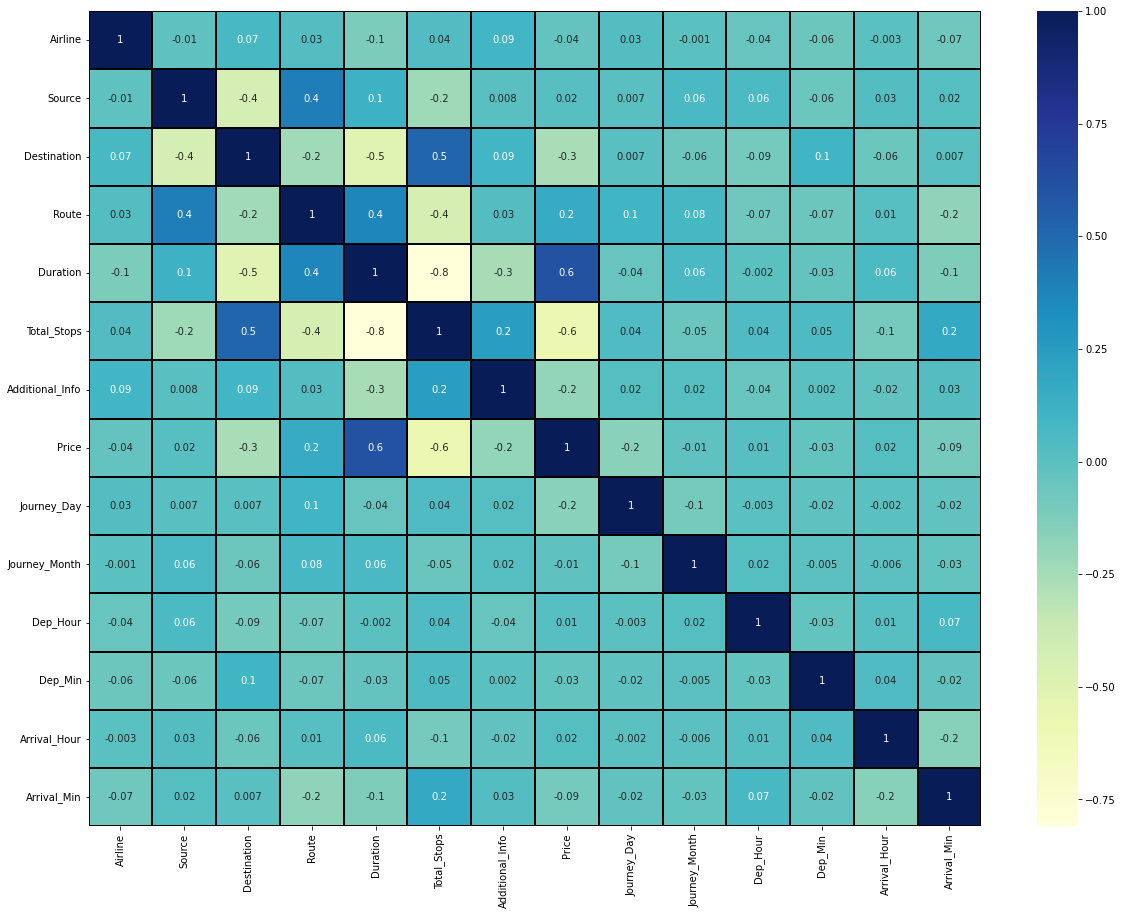

In [55]:
# Visualizing the correlation matrix by plotting heatmap.
plt.figure(figsize = (20, 15))
sns.heatmap(new_df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "YlGnBu")


This heatmap shows the correaltion matrix by visualizing the data. We can observe the relation between one feature to other.

1) This heatmap contain both positive and negative correlation.

2) The feature Duration is moderately positively correlated with the target variable "Price".

3) The feature Total_Stops is moderately Negatively correlated with the label.

4) The features Duration, Total_Stops and Destination are highly negatively correlated with each other.This may lead to multicollinearity problem, we will check vif values to avoid this.

In [60]:
new_df.corr()["Price"].sort_values(ascending = False)


Price              1.000000
Duration           0.605879
Route              0.163666
Arrival_Hour       0.021087
Source             0.016719
Dep_Hour           0.011411
Journey_Month     -0.013499
Dep_Min           -0.025551
Airline           -0.036918
Arrival_Min       -0.088909
Journey_Day       -0.163800
Additional_Info   -0.193469
Destination       -0.263341
Total_Stops       -0.572460
Name: Price, dtype: float64

# Visualizing the correlation between features and label using bar plot.

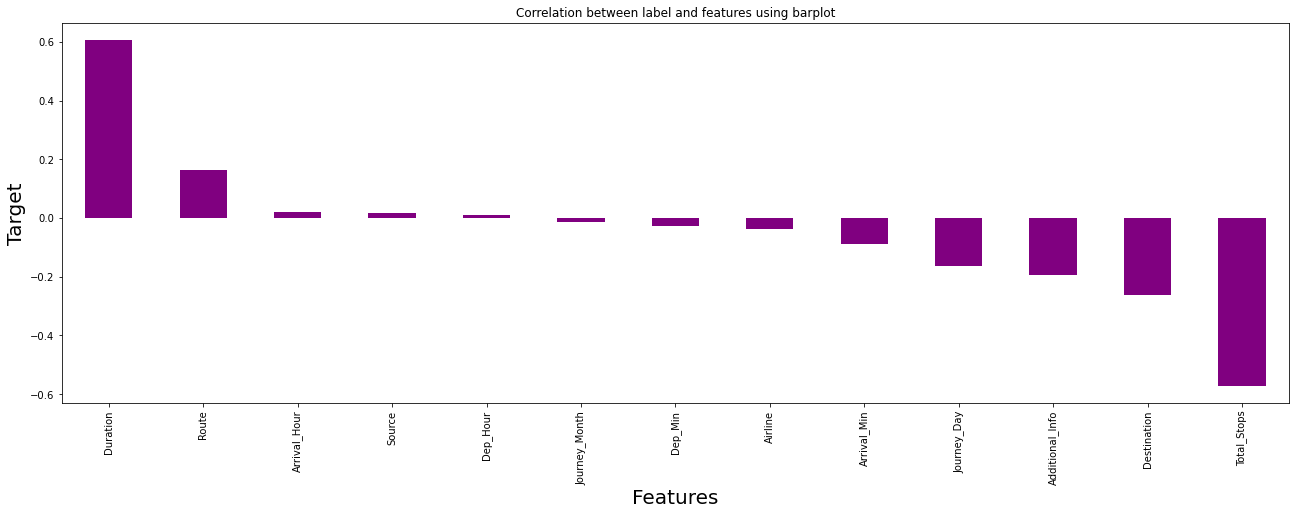

In [61]:
plt.figure(figsize = (22, 7))
new_df.corr()["Price"].sort_values(ascending = False).drop(["Price"]).plot(kind = "bar", color = "purple")
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Target', fontsize = 20)
plt.title('Correlation between label and features using barplot')
plt.show()

The features Journey_Month, Source, Arrival_Hour,Dep_Hour and Airline have very less correlation with the label so we will not  drop the columns.

# Separating the features and label.

In [62]:
x = new_df.drop("Price", axis = 1)
y = new_df["Price"]

# Feature Scaling using Standard Scalarization

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.416389,-1.654961,0.812654,-1.543901,-1.058197,1.402261,0.331578,1.286080,-0.754902,1.649369,-0.235793,-1.794792,-0.889164
1,-1.267036,0.888086,-1.157011,0.254569,0.007466,-0.253869,0.331578,-0.873993,-2.141692,-1.312206,1.362831,-0.046108,-0.586436
2,0.008934,0.040404,-0.172179,1.181053,1.051660,-0.253869,0.331578,-0.760305,1.078334,-0.615365,0.030644,-1.357621,0.019020
3,-0.416389,0.888086,-1.157011,0.445315,-0.340940,-0.805912,0.331578,-0.873993,1.603250,0.952528,-1.035105,1.411128,0.321749
4,-0.416389,-1.654961,0.812654,-1.244156,-0.486458,-0.805912,0.331578,-1.101369,-2.141692,0.604107,1.362831,1.119681,0.624477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611,-1.692360,0.888086,-1.157011,-0.290422,-1.196465,1.402261,0.331578,-0.987681,1.078334,1.126738,1.629269,1.265405,0.019020
10612,-1.267036,0.888086,-1.157011,-0.290422,-1.160252,1.402261,0.331578,1.627144,-0.308456,1.300948,1.096394,1.411128,-0.283708
10613,0.008934,-1.654961,0.812654,-1.543901,-0.995020,1.402261,0.331578,1.627144,-0.308456,-0.789575,-0.235793,-0.337556,-0.283708
10614,2.560876,-1.654961,0.812654,-1.543901,-1.125182,1.402261,0.331578,-1.101369,-2.141692,-0.266944,0.297082,0.099615,-0.889164


We have scaled the data using Standard Scalarization method to overcome the problem of biasness.

# Checking VIF(Variance Inflation Factor)

In [64]:
# Finding variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.047142,Airline
1,1.526467,Source
2,1.775449,Destination
3,1.568187,Route
4,3.303270,Duration
5,3.400207,Total_Stops
6,1.113892,Additional_Info
7,1.033601,Journey_Day
8,1.022376,Journey_Month
9,1.031377,Dep_Hour


As we can notice the vif values is less than 10 in all the columns,there is no multicollinearity exists. We can move ahead for model building.

# Modelling


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [69]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Creating new train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=25)


# Regression Algorithms


# Random Forest Regressor


In [88]:
# Checking R2 score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
predRFR = RFR.predict(x_test)
print("R2_score:", r2_score(y_test, predRFR))
print("MAE:", metrics.mean_absolute_error(y_test, predRFR))
print("MSE:", metrics.mean_squared_error(y_test, predRFR))
print("RSME:", np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_score: 0.8776528184236054
MAE: 669.9984563953053
MSE: 2509318.522065049
RSME: 1584.082864645991


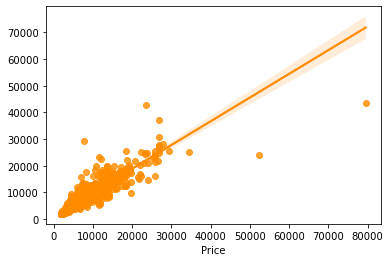

In [89]:
# Visualizing the predicted values
sns.regplot(y_test, predRFR, color = 'darkorange')
plt.show()

In [90]:
# Checking R2 score for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
predDTR = DTR.predict(x_test)
print("R2_score:", r2_score(y_test, predDTR))
print("MAE:", metrics.mean_absolute_error(y_test, predDTR))
print("MSE:", metrics.mean_squared_error(y_test, predDTR))
print("RSME:", np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_score: 0.7310445777717354
MAE: 768.0802197802197
MSE: 5516226.969117391
RSME: 2348.664933343492


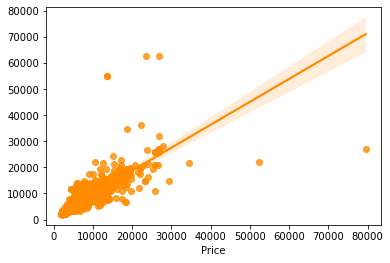

In [91]:
# Visualizing the predicted values
sns.regplot(y_test, predDTR, color = 'darkorange')
plt.show()

# GradientBoostingRegressor

In [92]:
# Checking R2 score for GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print("R2_score:", r2_score(y_test, predGB))
print("MAE:", metrics.mean_absolute_error(y_test, predGB))
print("MSE:", metrics.mean_squared_error(y_test, predGB))
print("RSME:", np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_score: 0.8364841078089145
MAE: 1209.4950893093405
MSE: 3353681.316074121
RSME: 1831.3059045593996


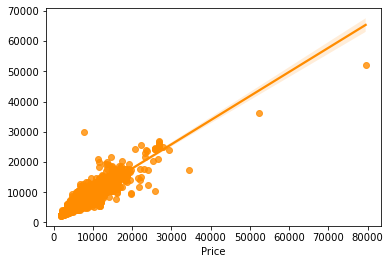

In [93]:
# Visualizing the predicted values
sns.regplot(y_test, predGB, color = 'darkorange')
plt.show()

# BaggingRegressor

In [94]:
# Checking R2 score for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train, y_train)
predBR = BR.predict(x_test)
print("R2_score:", r2_score(y_test, predBR))
print("MAE:", metrics.mean_absolute_error(y_test, predBR))
print("MSE:", metrics.mean_squared_error(y_test, predBR))
print("RSME:", np.sqrt(metrics.mean_squared_error(y_test, predBR)))

R2_score: 0.8518615609602473
MAE: 721.4538033440482
MSE: 3038292.5386813777
RSME: 1743.0698605280793


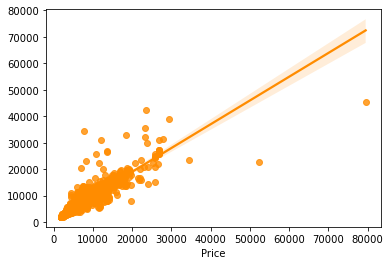

In [95]:
# Visualizing the predicted values
sns.regplot(y_test, predBR, color = 'darkorange')
plt.show()

# ExtraTreesRegressor

In [96]:
# Checking R2 score for ExtraTreesRegressor
XT = ExtraTreesRegressor()
XT.fit(x_train, y_train)
predXT = XT.predict(x_test)
print("R2_score:", r2_score(y_test, predXT))
print("MAE:", metrics.mean_absolute_error(y_test, predXT))
print("MSE:", metrics.mean_squared_error(y_test, predXT))
print("RSME:", np.sqrt(metrics.mean_squared_error(y_test, predXT)))

R2_score: 0.9079924579367838
MAE: 612.8775813710099
MSE: 1887058.0138762447
RSME: 1373.70230176565


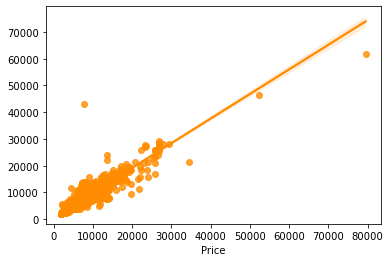

In [97]:
# Visualizing the predicted values
sns.regplot(y_test, predXT, color = 'darkorange')
plt.show()

# XGBRegressor

In [98]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

XGB = xgb(verbosity = 0)
XGB.fit(x_train, y_train)
predXGB = XGB.predict(x_test)
print("R2_score:", r2_score(y_test, predXGB))
print("MAE:", metrics.mean_absolute_error(y_test, predXGB))
print("MSE:", metrics.mean_squared_error(y_test, predXGB))
print("RSME:", np.sqrt(metrics.mean_squared_error(y_test, predXGB)))

R2_score: 0.9195194306748535
MAE: 721.2293748313629
MSE: 1650641.8919656947
RSME: 1284.7730896799228


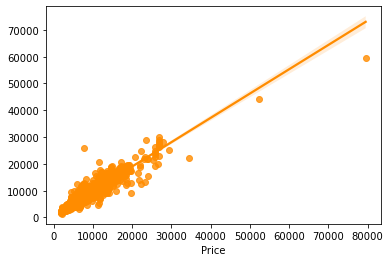

In [99]:
# Visualizing the predicted values
sns.regplot(y_test, predXGB, color = 'darkorange')
plt.show()

# Checking the cross validation score


In [100]:
from sklearn.model_selection import cross_val_score


In [102]:
# Checking cv score for Random Forest Regressor
score = cross_val_score(RFR, x, y, cv = 5)
print(score)
print("cross validation score:  ",score.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, predRFR)-abs(score.mean()))

[0.87163641 0.88381513 0.8819117  0.9017569  0.83161271]
cross validation score:   0.8741465701032549
Difference between R2 score and cross validation score is -  0.0035062483203505135


In [103]:
# Checking cv score for GradientBoostingRegressor
score = cross_val_score(GB, x, y, cv = 5)
print(score)
print("cross validation score:  ", score.mean())
print("Difference between R2 score and cross validatio score is - ", r2_score(y_test, predGB)-abs(score.mean()))

[0.81164743 0.81003859 0.82780545 0.82971118 0.82708748]
cross validation score:   0.8212580267061107
Difference between R2 score and cross validatio score is -  0.015226081102803768


In [104]:

# Checking cv score for BaggingRegressor
score = cross_val_score(BR, x, y, cv = 5)
print(score)
print("cross validation score:  ", score.mean())
print("Difference between R2 score and cross validatio score is - ", r2_score(y_test, predBR)-abs(score.mean()))

[0.85610999 0.87387218 0.86829719 0.88847326 0.80690165]
cross validation score:   0.8587308515817856
Difference between R2 score and cross validatio score is -  -0.006869290621538293


In [105]:
# Checking cv score for ExtraTreesRegressor
score = cross_val_score(XT, x, y, cv = 5)
print(score)
print("cross validation score:  ", score.mean())
print("Difference between R2 score and cross validatio score is - ", r2_score(y_test, predXT)-abs(score.mean()))

[0.9000165  0.91074904 0.8959699  0.90242624 0.88960017]
cross validation score:   0.8997523706715658
Difference between R2 score and cross validatio score is -  0.008240087265218077


In [106]:
# Checking cv score for XGBRegressor
score = cross_val_score(XGB, x, y, cv = 5)
print(score)
print("cross validation score:  ", score.mean())
print("Difference between R2 score and cross validatio score is - ", r2_score(y_test, predXGB)-abs(score.mean()))

[0.89592224 0.89265441 0.91382119 0.91081705 0.88964839]
cross validation score:   0.9005726551562951
Difference between R2 score and cross validatio score is -  0.01894677551855839


XGBRegressor model have highest accuracy i.e. 91.95%% with 90.05% cross validation score which is good and the difference is too less

# Hyperparameter tuning


In [107]:
from sklearn.model_selection import GridSearchCV


In [108]:
#XGBRegressor

parameters = {'n_estimator':[50, 100, 200, 400],
            'gamma':np.arange(0, 0.2, 0.1),
            'max_depth':[4, 6, 8, 10],
            'n_jobs':[-2, -1, 1]}

In [109]:
GCV = GridSearchCV(xgb(), parameters, cv = 5)

In [110]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...ot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
     

In [111]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimator': 50, 'n_jobs': -2}

In [112]:
Final_model = xgb(gamma = 0.0, max_depth = 6, n_estimator = 50, n_jobs = -2)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
print('R2_Score:', r2_score(y_test, pred)*100)
print("RMSE value:", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))

R2_Score: 91.95194306748536
RMSE value: 1284.7730896799228
MAE: 721.2293748313629
MSE: 1650641.8919656947


After tuning, the best R2 score is 91.95%.

# Saving the model

In [113]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,'Flight_Prediction.pkl')

['Flight_Prediction.pkl']

# Predicting the saved model

In [114]:
# Loading the saved model
Model = joblib.load("Flight_Prediction.pkl")

# prediction
a = np.array(y_test)
predicted = np.array(Model.predict(x_test))
df_com = pd.DataFrame({"Original" : a, "Predicted" : predicted}, index =  range(len(a)))
df_com

,Original,Predicted
0,8266,8304.930664
1,10441,10583.240234
2,12723,11455.773438
3,4049,4625.344727
4,3943,4444.159180
...,...,...
3180,12954,11471.839844
3181,12436,12634.972656
3182,13377,12990.258789
3183,10262,10691.648438


# Prediction Visualization

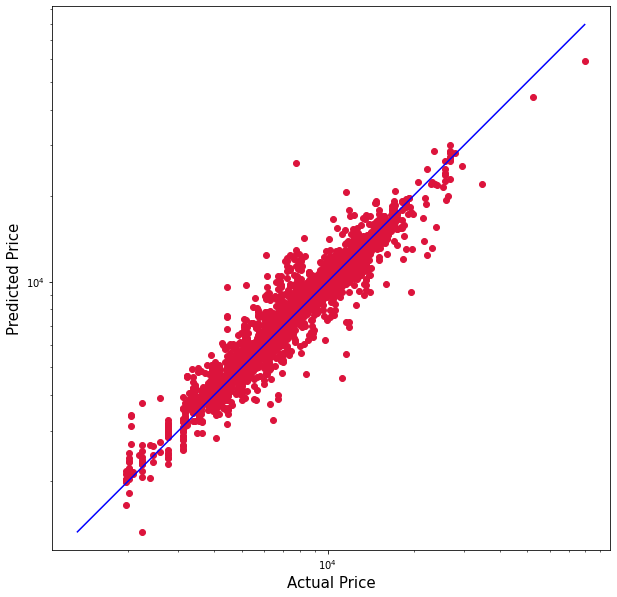

In [115]:
plt.figure(figsize = (10, 10))
plt.scatter(y_test, predicted, c = 'crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predicted), max(y_test))
p2 = min(min(predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize = 15)
plt.ylabel('Predicted Price', fontsize = 15)
plt.axis('equal')
plt.show()

# Test Data

# Importing Test data

In [117]:
# Reading the excel file 
test_df = pd.read_excel("Flight_Price_Prediction_Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Feature Engineering
1) The columns Date_of_Journey, Dep_Time and Arrival_Time showing object datatype.

2) As the data in it is datetime format, we have to convert it to timestamp for proper prediction.

In [119]:
# Converting Date and Time columns from object type to Date type
test_df['Date_of_Journey'] = pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time'] = pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time'] = pd.to_datetime(test_df['Arrival_Time'])

In [120]:
# Extracting Day from Date_of_journey column
test_df['Journey_Day'] = pd.to_datetime(test_df.Date_of_Journey, format = "%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
test_df['Journey_Month'] = pd.to_datetime(test_df.Date_of_Journey, format = "%d/%m/%Y").dt.month

So we have splitted the column Date_of_Journey into integer datatype , now we can drop this column as it is of no use.

In [121]:
# Dropping Date_of_journey column
test_df.drop("Date_of_Journey", axis = 1, inplace = True)

In [122]:
# Duration

test_df['Duration'] = test_df['Duration'].str.replace('h', '*60').str.replace(' ','+').str.replace('m', '*1').apply(eval)

#now lets convert this column into a numeric

test_df['Duration'] = pd.to_numeric(test_df['Duration'])

Extracting hours and mins from Arrival_Time column and dropping that column.

In [123]:
# Extracting Hours from Dep_Time column
test_df['Dep_Hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
test_df['Dep_Min'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

In [124]:
# Dropping Dep_Time column
test_df.drop("Dep_Time", axis = 1, inplace = True)

Similarly extracting hours and mins from Arrival_Time column and dropping that column.

In [125]:
# Extracting Arrival_Hour from Arrival_Time column
test_df['Arrival_Hour'] = pd.to_datetime(test_df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
test_df['Arrival_Min'] = pd.to_datetime(test_df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
test_df.drop("Arrival_Time", axis = 1, inplace = True)

In [126]:


# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi", "Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info", "No Info")


# Encoding Categorical data

In [128]:
# Encoding data using label encoding method
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
test_df[categorical_col] = test_df[categorical_col].apply(LE.fit_transform)
test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,655,0,4,6,6,17,30,4,25
1,3,3,0,65,240,0,4,5,12,6,20,10,20
2,4,2,1,76,1425,0,3,21,5,19,15,19,0
3,6,2,1,76,780,0,4,21,5,8,0,21,0
4,0,0,2,16,170,4,4,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,1435,0,4,6,6,20,30,20,25
2667,3,3,0,43,155,4,4,27,3,14,20,16,55
2668,4,2,1,76,395,0,4,3,6,21,50,4,25
2669,1,2,1,76,915,0,4,3,6,4,0,19,15


In [129]:
# Predicting the flight price from the features of the testing data
Predicted_Price = Model.predict(test_df)
Predicted_Price

array([12959.024, 13036.171, 12741.288, ..., 12959.024, 13249.424,
       12959.024], dtype=float32)

# Creating DataFrame and Saving the Predictions

In [130]:
Prediction = pd.DataFrame()
Prediction['Price'] = Predicted_Price
Prediction

,Price
0,12959.024414
1,13036.170898
2,12741.288086
3,11081.267578
4,13608.871094
...,...
2666,13437.703125
2667,13036.170898
2668,12959.024414
2669,13249.423828


In [131]:
# Saving the Predictions
Prediction.to_csv("Predicted_Flight_Price_Data.csv", index = False)